In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import sklearn.compose
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
def load_stockQF_data(stockQF_path = '/Users/j4yzer/PycharmProjects/VKR/data/stockQF.csv') -> pd.DataFrame:
    path = Path(stockQF_path)
    return pd.read_csv(path)
load_stockQF_data().info()
load_stockQF_data().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ticker                        1964 non-null   object 
 1   date                          1964 non-null   object 
 2   absoluteReturn                1923 non-null   float64
 3   relativeToSPReturn            1923 non-null   float64
 4   closePrice                    1964 non-null   float64
 5   dilutedEarningsPerShare       1964 non-null   float64
 6   freeCashFlowPerShare          1964 non-null   float64
 7   bookValuePerShare             1964 non-null   float64
 8   equityRatio                   1964 non-null   float64
 9   marketCap                     1964 non-null   int64  
 10  priceToEarningsRatio          1964 non-null   float64
 11  priceToSalesRatio             1964 non-null   float64
 12  priceToFreeCashFlow           1964 non-null   float64
 13  pri

,absoluteReturn,relativeToSPReturn,closePrice,dilutedEarningsPerShare,freeCashFlowPerShare,bookValuePerShare,equityRatio,marketCap,priceToEarningsRatio,priceToSalesRatio,...,enterpriseValueToSalesRatio,currentRatio,grahamNumber,roic,netCurrentAssetValuePerShare,ebitdaMargin,netIncomeMargin,returnOnAssets,returnOnEquity,priceEarningsToGrowthRatio
count,1923.000000,1923.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1964.000000,1964.000000,...,1964.000000,1964.000000,1837.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,0.0
mean,inf,inf,79.386387,0.984074,1.081645,16.545863,0.406952,1.684941e+11,33.829541,3.101120,...,3.144946,1.555298,19.157677,0.149358,-15.995324,0.246144,0.136212,0.095729,0.045573,NaN
std,NaN,NaN,65.470835,1.117868,1.425874,15.290371,0.191249,2.384101e+11,362.196065,2.776928,...,2.725001,0.830834,14.457032,0.122168,19.438648,0.179640,0.133876,0.056844,6.208551,NaN
min,-0.542178,-0.369990,0.000000,-14.592721,-9.869300,-31.325800,-0.519500,0.000000e+00,-4024.962700,0.000000,...,-0.600500,0.000000,0.000000,-2.281500,-107.634209,-2.845200,-1.699700,-0.275000,-257.973600,NaN
25%,-0.041589,-0.057267,34.412500,0.405658,0.368175,7.107475,0.302550,6.317090e+10,14.056450,1.174625,...,1.365450,1.018800,9.598666,0.092600,-25.847534,0.135425,0.060275,0.058975,0.146175,NaN
50%,0.024907,0.002507,58.205000,0.788215,0.846600,13.561150,0.426350,1.208355e+11,18.351550,2.445150,...,2.483650,1.327250,16.037731,0.137100,-9.168891,0.235150,0.120800,0.090850,0.219000,NaN
75%,0.102588,0.068785,104.982500,1.400087,1.495825,22.150675,0.543100,1.970404e+11,23.800350,3.941850,...,3.841625,1.818450,25.616791,0.198625,-0.991197,0.335050,0.202600,0.132500,0.306825,NaN
max,inf,inf,513.630000,6.913542,18.802700,87.469400,0.809300,2.900499e+12,10439.343000,22.249700,...,22.320100,6.333800,105.852207,1.394100,5.022918,3.292900,1.565600,0.385300,31.563800,NaN


In [3]:
stockQF = load_stockQF_data().drop('priceEarningsToGrowthRatio', axis=1).replace([np.inf, -np.inf], np.nan).dropna()
stockQF.info()
stockQF.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 1 to 1963
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ticker                        1796 non-null   object 
 1   date                          1796 non-null   object 
 2   absoluteReturn                1796 non-null   float64
 3   relativeToSPReturn            1796 non-null   float64
 4   closePrice                    1796 non-null   float64
 5   dilutedEarningsPerShare       1796 non-null   float64
 6   freeCashFlowPerShare          1796 non-null   float64
 7   bookValuePerShare             1796 non-null   float64
 8   equityRatio                   1796 non-null   float64
 9   marketCap                     1796 non-null   int64  
 10  priceToEarningsRatio          1796 non-null   float64
 11  priceToSalesRatio             1796 non-null   float64
 12  priceToFreeCashFlow           1796 non-null   float64
 13  pri

,absoluteReturn,relativeToSPReturn,closePrice,dilutedEarningsPerShare,freeCashFlowPerShare,bookValuePerShare,equityRatio,marketCap,priceToEarningsRatio,priceToSalesRatio,...,priceToBookRatio,enterpriseValueToSalesRatio,currentRatio,grahamNumber,roic,netCurrentAssetValuePerShare,ebitdaMargin,netIncomeMargin,returnOnAssets,returnOnEquity
count,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1.796000e+03,1796.000000,1796.000000,...,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,0.030157,0.009094,78.363493,1.056261,1.089229,17.087909,0.421007,1.739394e+11,33.708230,3.044146,...,8.394632,3.072551,1.582002,19.453694,0.153791,-15.269746,0.251119,0.148307,0.099182,0.293499
std,0.123077,0.104579,63.189079,1.045758,1.408732,14.743288,0.174682,2.467781e+11,351.279056,2.725181,...,45.050227,2.653167,0.835169,14.440412,0.090958,18.806394,0.161689,0.113817,0.052260,1.542210
min,-0.542178,-0.369990,0.480000,-14.592721,-9.869300,-31.325800,-0.128200,1.440473e+09,-4024.962700,0.260300,...,-44.857400,0.321500,0.000000,0.000000,-0.257100,-107.634209,-0.492800,-0.550100,-0.077900,-26.182700
25%,-0.041018,-0.056785,34.848000,0.465200,0.384150,7.897400,0.318350,6.624276e+10,14.252450,1.186100,...,2.821700,1.373900,1.031100,9.855778,0.099000,-21.984307,0.141150,0.068000,0.064200,0.163975
50%,0.024118,0.002335,58.405000,0.823841,0.852200,14.064000,0.436450,1.219617e+11,18.137800,2.442750,...,4.137050,2.475800,1.337450,16.459629,0.141300,-9.094368,0.242350,0.129400,0.093800,0.228100
75%,0.100331,0.067968,103.003250,1.405981,1.489875,22.325900,0.545725,1.993808e+11,23.172025,3.839525,...,6.244875,3.743750,1.872275,25.821800,0.199625,-0.889473,0.334100,0.203700,0.133300,0.317950
max,0.666667,0.581062,513.630000,6.913542,18.802700,87.469400,0.809300,2.900499e+12,10439.343000,22.249700,...,1300.263900,22.320100,6.333800,105.852207,0.836100,5.022918,3.292900,1.565600,0.366200,31.563800


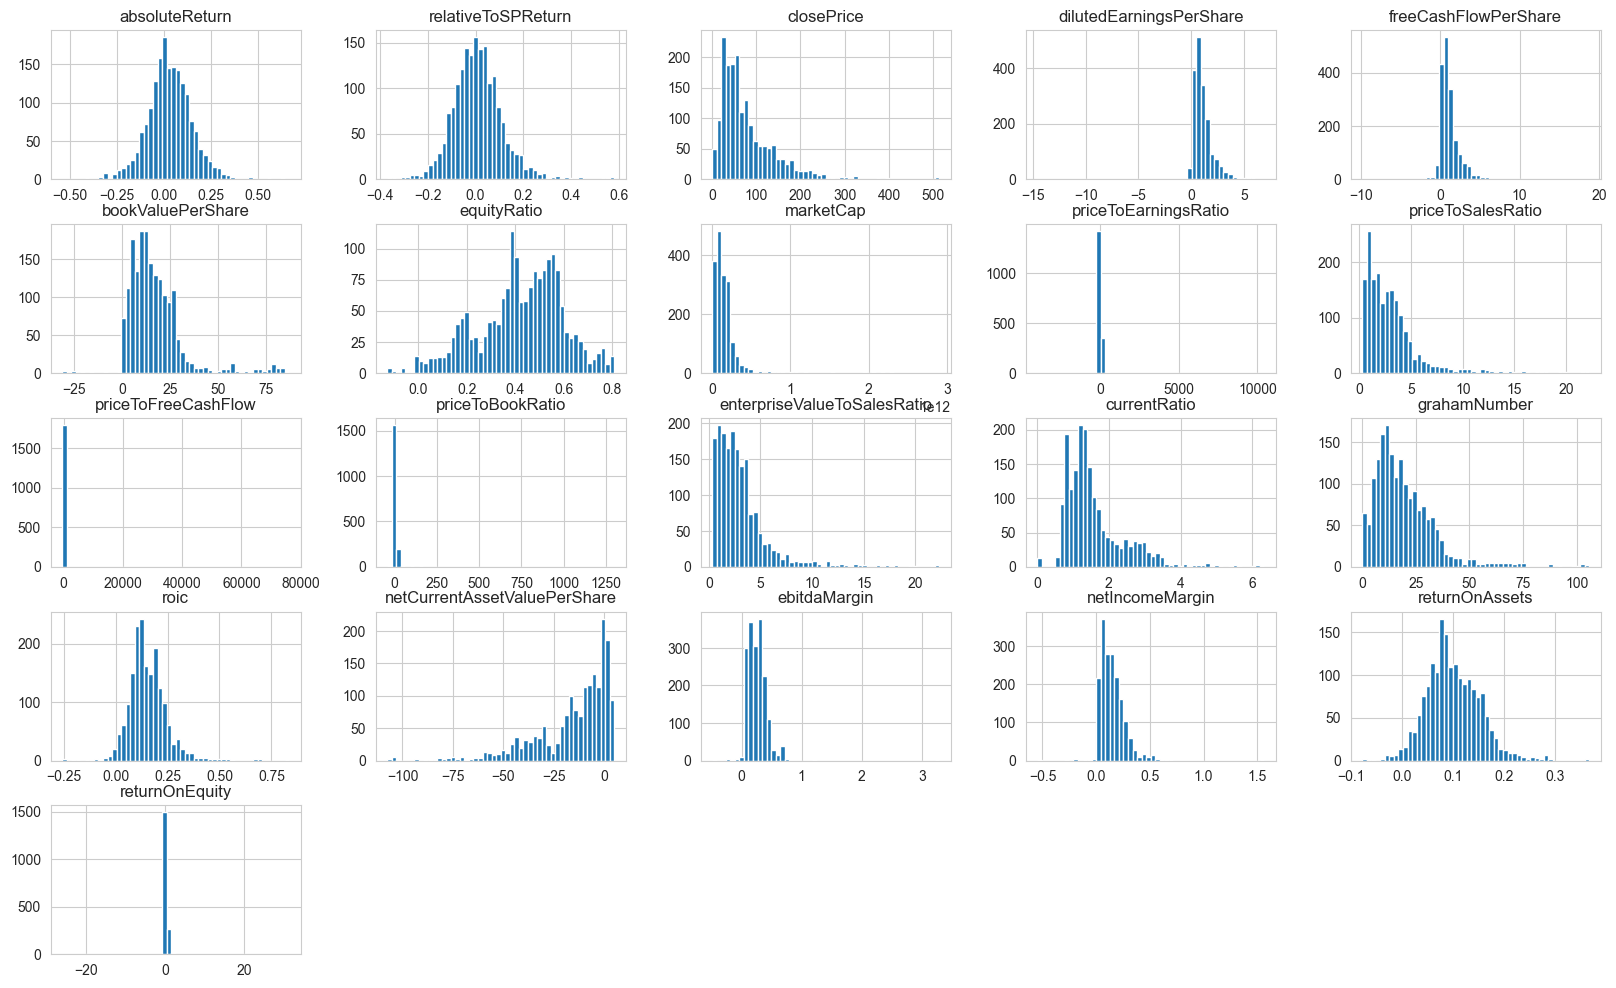

In [4]:
stockQF.hist(figsize=(20, 12), bins=50)
plt.show()

C:\Users\j4yze\AppData\Local\Temp\ipykernel_14728\3580516825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stockQF.corr())


<AxesSubplot: >

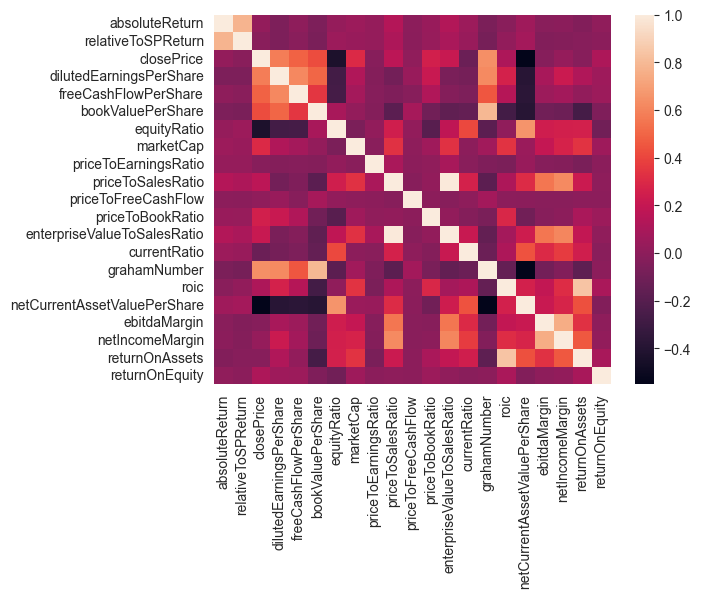

In [5]:
sns.heatmap(stockQF.corr())

array([[<AxesSubplot: xlabel='relativeToSPReturn', ylabel='relativeToSPReturn'>,
        <AxesSubplot: xlabel='priceToSalesRatio', ylabel='relativeToSPReturn'>,
        <AxesSubplot: xlabel='priceToBookRatio', ylabel='relativeToSPReturn'>,
        <AxesSubplot: xlabel='roic', ylabel='relativeToSPReturn'>,
        <AxesSubplot: xlabel='grahamNumber', ylabel='relativeToSPReturn'>,
        <AxesSubplot: xlabel='closePrice', ylabel='relativeToSPReturn'>],
       [<AxesSubplot: xlabel='relativeToSPReturn', ylabel='priceToSalesRatio'>,
        <AxesSubplot: xlabel='priceToSalesRatio', ylabel='priceToSalesRatio'>,
        <AxesSubplot: xlabel='priceToBookRatio', ylabel='priceToSalesRatio'>,
        <AxesSubplot: xlabel='roic', ylabel='priceToSalesRatio'>,
        <AxesSubplot: xlabel='grahamNumber', ylabel='priceToSalesRatio'>,
        <AxesSubplot: xlabel='closePrice', ylabel='priceToSalesRatio'>],
       [<AxesSubplot: xlabel='relativeToSPReturn', ylabel='priceToBookRatio'>,
        <AxesSu

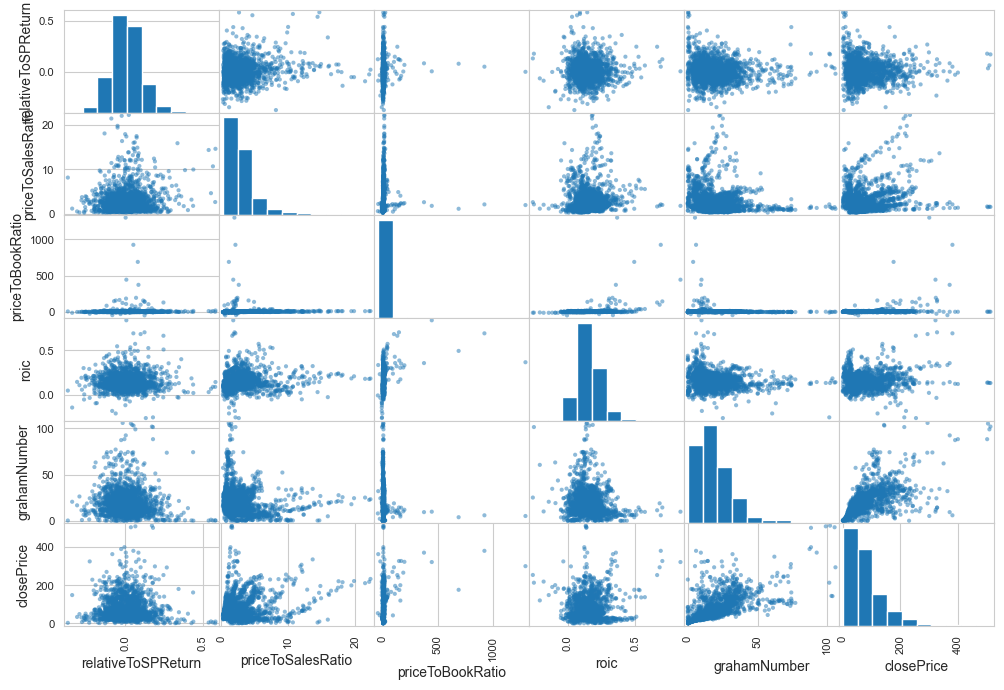

In [5]:
# stockQF.corr()['relativeToSPReturn'].sort_values(ascending=False)
pd.plotting.scatter_matrix(stockQF[['relativeToSPReturn', 'priceToSalesRatio', 'priceToBookRatio', 'roic', 'grahamNumber', 'closePrice']], figsize=(12, 8))

In [7]:
regr = LinearRegression()
res = regr.fit(y=stockQF['relativeToSPReturn'], X=stockQF.drop(['absoluteReturn', 'relativeToSPReturn', 'ticker', 'date'], axis=1))
res.score(y=stockQF['relativeToSPReturn'], X=stockQF.drop(['absoluteReturn', 'relativeToSPReturn', 'ticker', 'date'], axis=1))

0.05103128136086099

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


X = stockQF.drop(['absoluteReturn', 'relativeToSPReturn', 'ticker', 'date'], axis=1)
sc = StandardScaler()
X = sc.fit_transform(X)
res = (RandomForestRegressor(random_state=42))
X_train, X_test, y_train, y_test = train_test_split(X, stockQF['relativeToSPReturn'],test_size=0.2, random_state=42)
forest_rmses = -cross_val_score(res, X_train,
y_train,scoring="neg_root_mean_squared_error", cv=10)
fit_res = res.fit(X_train, y_train)
print(mean_squared_error(y_train, fit_res.predict(X_train), squared=False))
print(mean_absolute_error(y_train, fit_res.predict(X_train)))

0.038776914898321725
0.029224794442803164


count    10.000000
mean      0.104585
std       0.022483
min       0.083332
25%       0.088514
50%       0.095174
75%       0.113644
max       0.146199
dtype: float64
0.10051994778887724
0.077115821770903
count    360.000000
mean      -0.001489
std        0.100649
min       -0.333714
25%       -0.070256
50%       -0.002370
75%        0.055390
max        0.426940
dtype: float64


<AxesSubplot: ylabel='Frequency'>

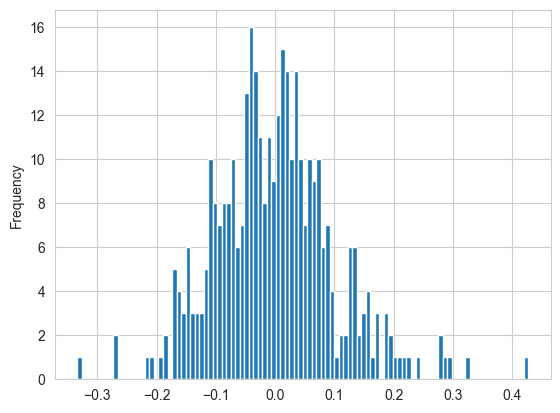

In [39]:

print(pd.Series(forest_rmses).describe())
print(mean_squared_error(y_test, fit_res.predict(X_test), squared=False))
print(mean_absolute_error(y_test, fit_res.predict(X_test)))
resid : pd.Series = y_test - pd.Series(fit_res.predict(X_test), y_test.index)
print(resid.describe())
resid.sort_index().plot.hist(bins=100)

Overfitting

In [78]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

X = stockQF.drop(['absoluteReturn', 'relativeToSPReturn', 'ticker', 'date'], axis=1)
prep = make_pipeline(ColumnTransformer([("standartization", make_pipeline(StandardScaler()), make_column_selector(dtype_include=np.number))], remainder='passthrough'), SelectFromModel(estimator=RandomForestRegressor()))
svr = Pipeline([("prep", prep),("svr", SVR())])
grid = [{"svr__kernel": ['rbf'],
         "svr__C": [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0],
         "svr__gamma": ['auto', 'scale']},
        {"svr__kernel": ['linear'],
         "svr__C": [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]}]
grids : GridSearchCV = GridSearchCV(param_grid=grid, estimator=svr, cv=3, scoring='neg_root_mean_squared_error').fit(X=pd.DataFrame(X_train, columns=X.columns, index=y_train.index), y=y_train)


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

print(grids.best_params_)
grids.best_score_


In [80]:
import scipy.stats as scs

param_distribs = [{"svr__kernel": ['rbf'],
                     "svr__C": scs.uniform(1, 300),
                     "svr__gamma": scs.expon(scale=1.0)},
                    {"svr__kernel": ['linear'],
                     "svr__C": scs.uniform(0.1, 1)}]
rs = RandomizedSearchCV(param_distributions=param_distribs, estimator=svr, cv=3, scoring='neg_root_mean_squared_error', n_iter=13, random_state=42).fit(X=pd.DataFrame(X_train, columns=X.columns, index=y_train.index), y=y_train)

In [81]:
print(rs.best_params_)
rs.best_score_

{'svr__C': 0.10077876584101433, 'svr__kernel': 'linear'}


-0.10660584577748661